<a href="https://colab.research.google.com/github/N3wBaz/MLzoomcamp/blob/main/hw2/homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
data = pd.read_csv('housing.csv')

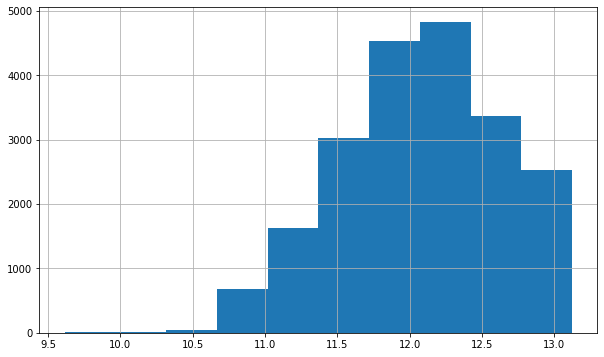

In [ ]:
np.log(data['median_house_value']).hist()

In [ ]:
# sns.histplot(data=df, x="median_house_value", log_scale=[True, False])

In [ ]:
features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
              'population', 'households', 'median_income', 'median_house_value']
df = data[features]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
# ----------------------
#      Question 1 
# ----------------------

df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [ ]:
# ----------------------
#      Question 2 
# ----------------------

df['population'].median()

1166.0

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
SEED = 42

def split_with_seed(seed):
    np.random.seed(seed)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # y_train_orig = df_train['median_house_value'].values
    # y_val_orig = df_val['median_house_value'].values
    # y_test_orig = df_test['median_house_value'].values

    y_train = np.log(df_train['median_house_value'].values)
    y_val = np.log(df_val['median_house_value'].values)
    y_test = np.log(df_test['median_house_value'].values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    return df_train, y_train, df_val, y_val, df_test, y_test

In [ ]:
df_train, y_train, df_val, y_val, df_test, y_test = split_with_seed(SEED)
print(df_train.shape, df_val.shape, df_test.shape)

(12384, 8) (4128, 8) (4128, 8)


In [ ]:
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [ ]:
# from pandas.core.computation.pytables import pprint_thing
def prepare_X(df, mean_val=df_train['total_bedrooms'].mean(), key=None):
    if key == 'mean':
        data_fill = df.fillna(df['total_bedrooms'].mean())
    else:
        data_fill = df.fillna(0)
    X = data_fill
    return X

In [ ]:
df_with_mean = prepare_X(df_train, key = 'mean')
df_with_zero = prepare_X(df_train)

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv @ X.T @ y
    
    return w[0], w[1:]


In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = ((y - y_pred) ** 2).mean()
    return np.sqrt(mse)

In [ ]:
# ----------------------
#      Question 3 
# ----------------------


w_0, w = train_linear_regression(df_with_mean, y_train)
y_pred_mean = w_0 + prepare_X(df_val, key = 'mean') @ w

w_0, w = train_linear_regression(df_with_zero, y_train)
y_pred_zero = w_0 + prepare_X(df_val) @ w
rmse_mean = rmse(y_pred_mean, y_val)
rmse_zero = rmse(y_pred_zero, y_val)
print(f"RMSE with mean value: {round(rmse_mean, 2)}, RMSE with zero value: {round(rmse_zero, 2)}")

RMSE with mean value: 0.33, RMSE with zero value: 0.33


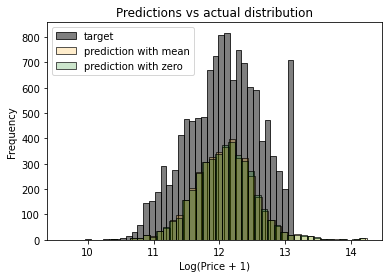

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='black', alpha=0.5, bins=40)
sns.histplot(y_pred_mean, label='prediction with mean', color='orange', alpha=0.2, bins=40)
sns.histplot(y_pred_zero, label='prediction with zero', color='green', alpha=0.2, bins=40)


plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()


In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [ ]:
# ----------------------
#      Question 4 
# ----------------------


for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred_val = w_0 + X_val @ w
    print(f"regularization : {r},    RMSE : {round(rmse(y_pred_val, y_val), 2)}")
    

regularization : 0,    RMSE : 0.33
regularization : 0.001,    RMSE : 0.33
regularization : 0.01,    RMSE : 0.33
regularization : 0.1,    RMSE : 0.33
regularization : 1,    RMSE : 0.33
regularization : 10,    RMSE : 0.34


In [ ]:
# ----------------------
#      Question 5 
# ----------------------

scores = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seeds:
    x_train, y_train, x_val, y_val, *_ = split_with_seed(seed)
    X_train = prepare_X(x_train)
    X_val = prepare_X(x_val)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val @ w
    scores.append(rmse(y_pred, y_val))
round(np.std(scores), 3)

0.004

In [ ]:
# ----------------------
#      Question 6 
# ----------------------

df_train, y_train, df_val, y_val, df_test, y_test = split_with_seed(9)

In [ ]:
new_df = pd.concat([df_train, df_val],sort=False, axis=0)
new_df.shape

(16512, 8)

In [ ]:
new_y = np.concatenate((y_train, y_val),axis=0)

In [ ]:
print(new_df.isnull().sum())

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
dtype: int64


In [ ]:
X_new = prepare_X(new_df)
X_test = prepare_X(df_test)

In [ ]:
w_0, w = train_linear_regression_reg(X_new, new_y, r=0.001)
y_pred = w_0 + X_test @ w
print(f"RMSE: {round(rmse(y_test, y_pred), 2)}")

RMSE: 0.35
